#Import Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from catboost import CatBoostClassifier


#Data Loading


In [2]:
df = pd.read_csv("C:\\Users\\user\\Downloads\\mushroom_cleaned.csv")
df.head().T

,0,1,2,3,4
cap-diameter,1372.000000,1461.000000,1371.000000,1261.000000,1305.000000
cap-shape,2.000000,2.000000,2.000000,6.000000,6.000000
gill-attachment,2.000000,2.000000,2.000000,2.000000,2.000000
gill-color,10.000000,10.000000,10.000000,10.000000,10.000000
stem-height,3.807467,3.807467,3.612496,3.787572,3.711971
stem-width,1545.000000,1557.000000,1566.000000,1566.000000,1464.000000
stem-color,11.000000,11.000000,11.000000,11.000000,11.000000
season,1.804273,1.804273,1.804273,1.804273,0.943195
class,1.000000,1.000000,1.000000,1.000000,1.000000


Data Cleaning

In [3]:
# Checking for null values
print("Null Values:")
print(df.isnull().sum())


Null Values:
cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64


In [4]:
# Checking for duplicates
print("\nDuplicate Values:")
print(df.duplicated().sum())

# Dropping duplicates
df.drop_duplicates(inplace=True)
print("\nShape after dropping duplicates:")
print(df.shape)


Duplicate Values:
303

Shape after dropping duplicates:
(53732, 9)


#Data Visualization

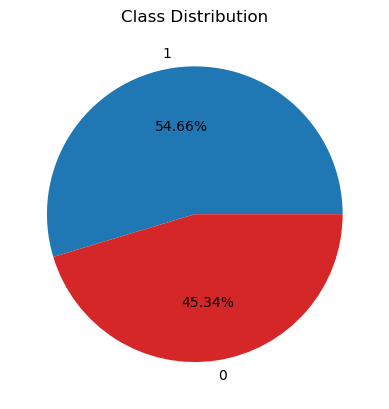

In [5]:
# Visualizing the class distribution
class_distribution = df['class'].value_counts().reset_index()
class_distribution.columns = ['index', 'class']  # Renaming columns for clarity

# Custom color palette: Blue and Dark Red
colors = ['#1f77b4', '#d62728']  # You can adjust these hex codes to get different shades of blue and red

# Plot the pie chart with custom colors
plt.pie(class_distribution['class'], labels=class_distribution['index'], autopct='%0.2f%%', colors=colors)
plt.title("Class Distribution")
plt.show()

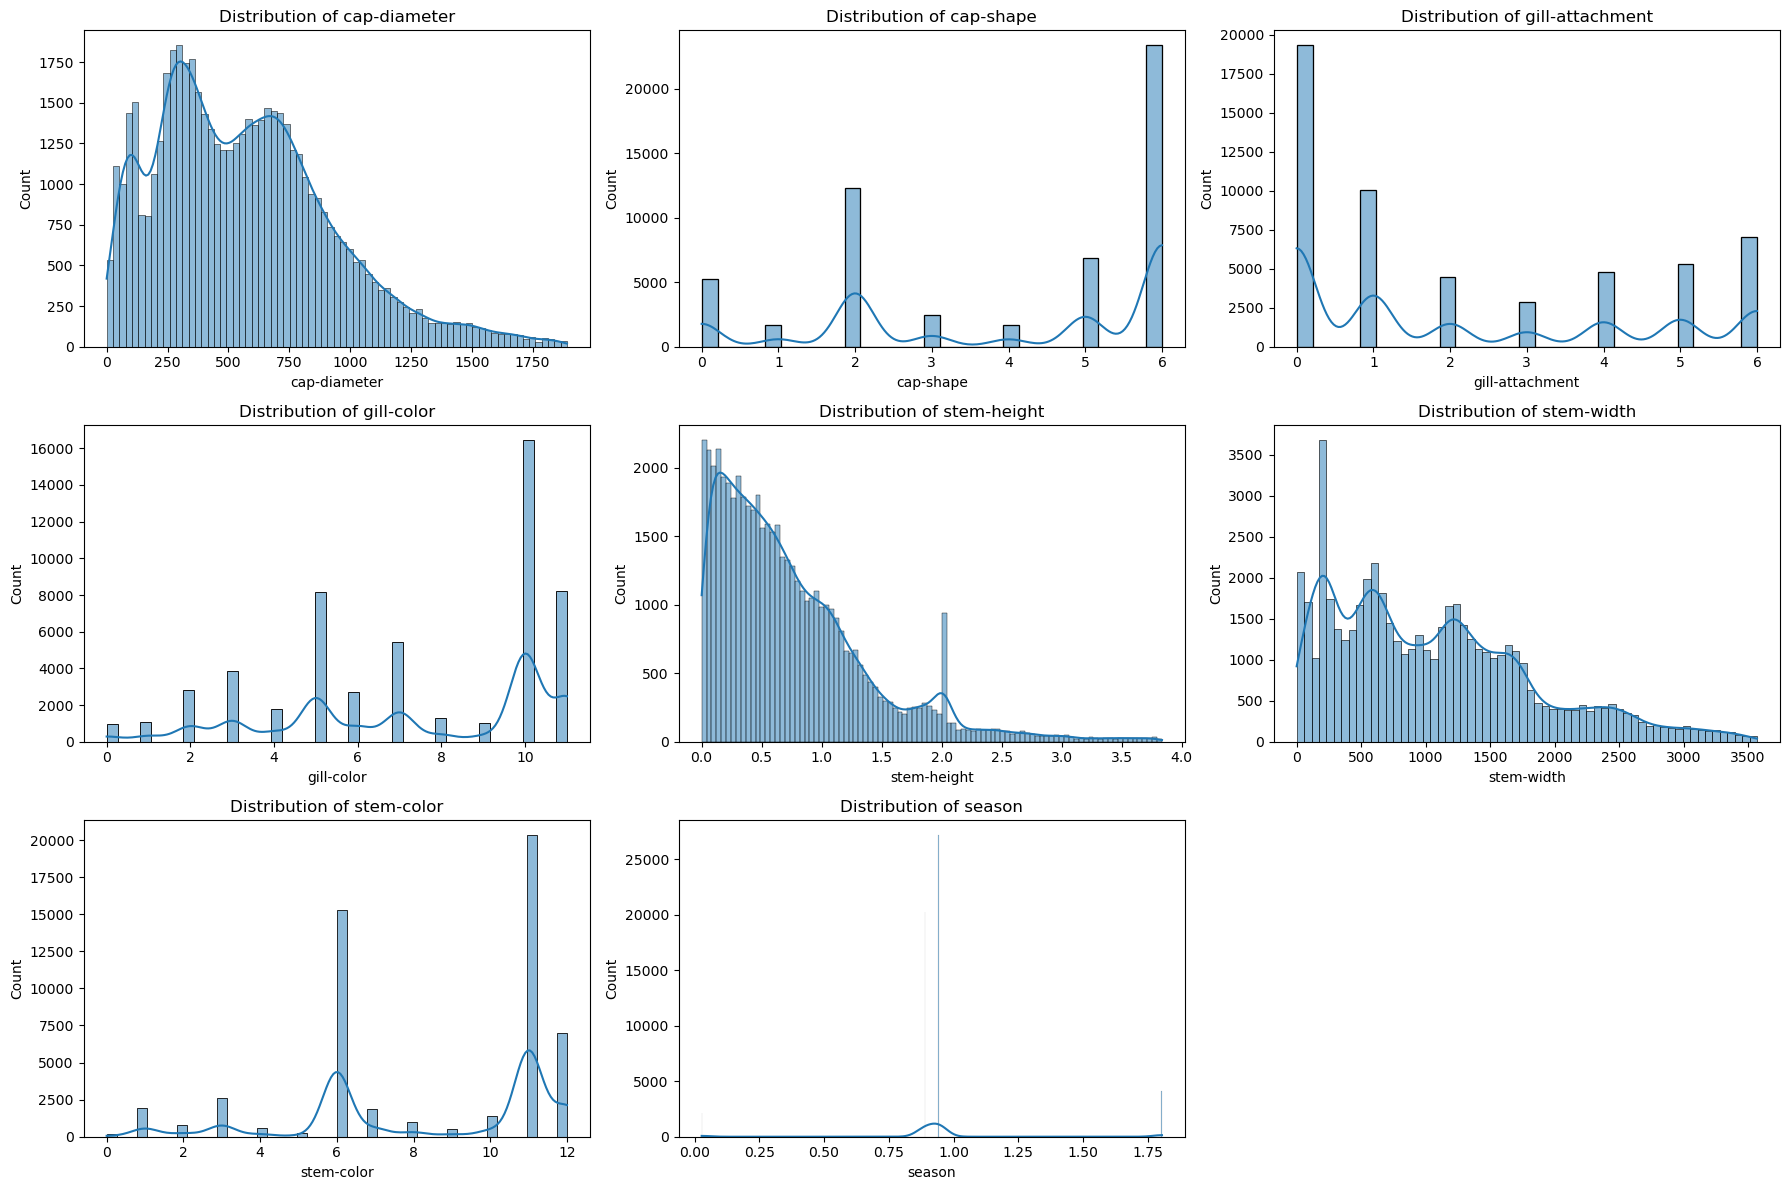

In [6]:
# Visualizing feature distributions
features_to_plot = df.drop(columns=['class'])
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(features_to_plot.columns):
    sns.histplot(data=features_to_plot, x=col, ax=axes[idx], kde=True)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)

for i in range(len(features_to_plot.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Splitting data into features and target


In [7]:
X = df.drop('class', axis=1)
y = df['class']

In [8]:
# Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


# Model Evaluation Function

In [10]:
import time
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Function to calculate and display evaluation metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Training Time
    training_time = time.time() - start_time
    
    # Print results
    print(f"\n{model.__class__.__name__} Model:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Training Time: {training_time:.4f} seconds")
    
    # Display Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"{model.__class__.__name__} Confusion Matrix")
    plt.show()

# K-Nearest Neighbors (KNN) Model



KNN Model Training Score: 0.9890194253809469
KNN Model Test Score: 0.9866939611054247

KNeighborsClassifier Model:
Accuracy: 0.9867
Precision: 0.9884
Recall: 0.9872
F1-Score: 0.9878
Training Time: 1.8813 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4872
           1       0.99      0.99      0.99      5875

    accuracy                           0.99     10747
   macro avg       0.99      0.99      0.99     10747
weighted avg       0.99      0.99      0.99     10747



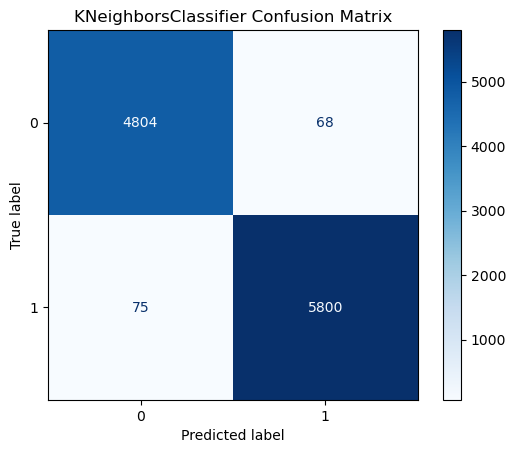

In [11]:
import time
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto')
knn.fit(X_train, y_train)
print("\nKNN Model Training Score:", knn.score(X_train, y_train))
print("KNN Model Test Score:", knn.score(X_test, y_test))
evaluate_model(knn, X_train, y_train, X_test, y_test)


# Logistic Regression Model with Grid Search



Best Parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Test Score: 0.6407369498464688

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.56      0.58      4872
           1       0.66      0.71      0.68      5875

    accuracy                           0.64     10747
   macro avg       0.64      0.63      0.63     10747
weighted avg       0.64      0.64      0.64     10747


Logistic Regression Accuracy: 0.6407369498464688

GridSearchCV Model:
Accuracy: 0.6407
Precision: 0.6593
Recall: 0.7093
F1-Score: 0.6834
Training Time: 16.3058 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.56      0.58      4872
           1       0.66      0.71      0.68      5875

    accuracy                           0.64     10747
   macro avg       0.64      0.63      0.63     10747
weighted avg       

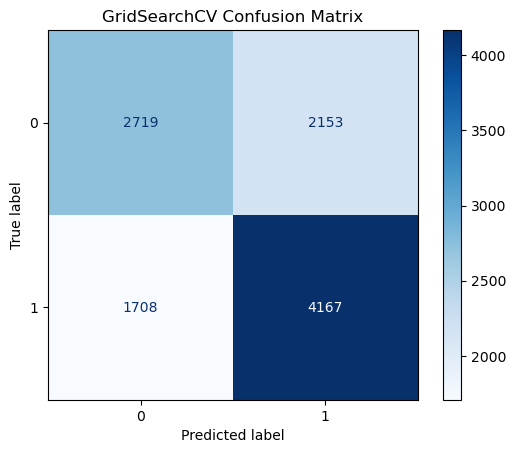

In [ ]:
log_reg_params = {
    'penalty': ['l1', 'l2'], 
    'C': [0.1, 0.01, 1.0, 10, 100],
    'solver': ['liblinear', 'newton-cg', 'sag', 'saga']
}

# Create a custom function to ensure correct solver-penalty combinations
def valid_solver_penalty_combinations(param_grid):
    param_grid_copy = param_grid.copy()
    
   
    if 'liblinear' not in param_grid_copy['solver']:
        param_grid_copy['penalty'] = ['l2']  
    
    if 'newton-cg' in param_grid_copy['solver']:
        param_grid_copy['penalty'] = ['l2'] 

    return param_grid_copy

log_reg_params = valid_solver_penalty_combinations(log_reg_params)

log_reg_model = GridSearchCV(LogisticRegression(), param_grid=log_reg_params)
log_reg_model.fit(X_train, y_train)

print("\nBest Parameters for Logistic Regression:", log_reg_model.best_params_)
print("Logistic Regression Test Score:", log_reg_model.score(X_test, y_test))

y_pred_log_reg = log_reg_model.predict(X_test)
print("\nLogistic Regression Classification Report:")
print(metrics.classification_report(y_test, y_pred_log_reg))
print("\nLogistic Regression Accuracy:", metrics.accuracy_score(y_test, y_pred_log_reg))
evaluate_model(log_reg_model, X_train, y_train, X_test, y_test)


# Support Vector Machine (SVM) Model with Grid Search



SVM Model Accuracy: 90.37%

SVC Model:
Accuracy: 0.9037
Precision: 0.9312
Recall: 0.8895
F1-Score: 0.9099
Training Time: 105.2366 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4872
           1       0.93      0.89      0.91      5875

    accuracy                           0.90     10747
   macro avg       0.90      0.91      0.90     10747
weighted avg       0.91      0.90      0.90     10747



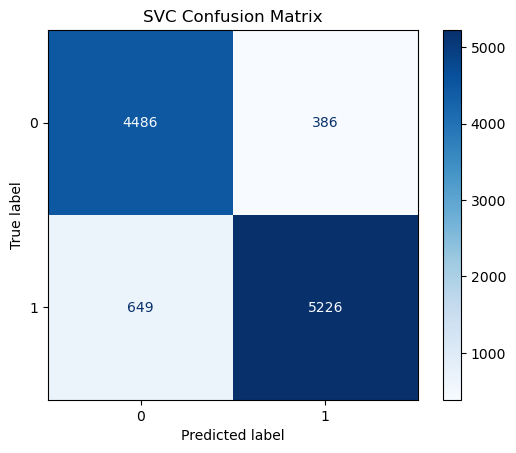

In [16]:
# Support Vector Machine (SVM)
svc = SVC(kernel="rbf", C=1.0, class_weight='balanced')
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)
svc_accuracy = metrics.accuracy_score(y_test, svc_predictions)
print(f"\nSVM Model Accuracy: {svc_accuracy * 100:.2f}%")
evaluate_model(svc, X_train, y_train, X_test, y_test)



# Random Forest


Random Forest accuracy:  0.9898576346887503

RandomForestClassifier Model:
Accuracy: 0.9903
Precision: 0.9928
Recall: 0.9894
F1-Score: 0.9911
Training Time: 6.9360 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4872
           1       0.99      0.99      0.99      5875

    accuracy                           0.99     10747
   macro avg       0.99      0.99      0.99     10747
weighted avg       0.99      0.99      0.99     10747



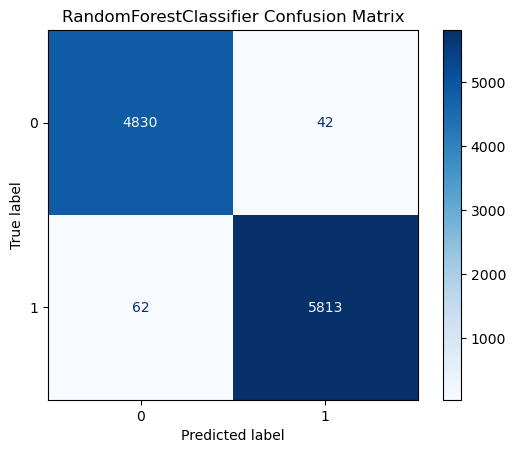

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest accuracy: ",rf_accuracy)
evaluate_model(rf_model, X_train, y_train, X_test, y_test)


# CatBoost


CatBoostClassifier Model:
Accuracy: 0.9886
Precision: 0.9903
Recall: 0.9889
F1-Score: 0.9896
Training Time: 18.0626 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4872
           1       0.99      0.99      0.99      5875

    accuracy                           0.99     10747
   macro avg       0.99      0.99      0.99     10747
weighted avg       0.99      0.99      0.99     10747



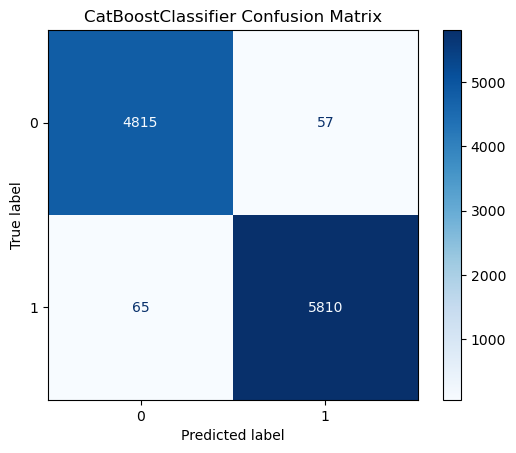

In [20]:
#Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(verbose=0, random_state=42)

#Evaluate CatBoost Model
evaluate_model(catboost_model, X_train, y_train, X_test, y_test)